<a href="https://colab.research.google.com/github/FaithWanjiruN/Machine-Learning-assignments/blob/main/Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
data = pd.read_excel(url)

# Check the first few rows of the dataset
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# Check for missing values
print(data.isnull().sum())

# Display dataset statistics
print(data.describe())


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64
       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   54

In [12]:
# Print the column names to verify
print(data.columns)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [13]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Verify the column names again
print(data.columns)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')


In [16]:
# Define features and target (update with corrected column name)
X = data.drop('Concrete compressive strength(MPa, megapascals)', axis=1)
y = data['Concrete compressive strength(MPa, megapascals)']


In [17]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [20]:
# Make predictions
y_pred = knn.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 72.41719009505977
R-squared: 0.7189658324141466


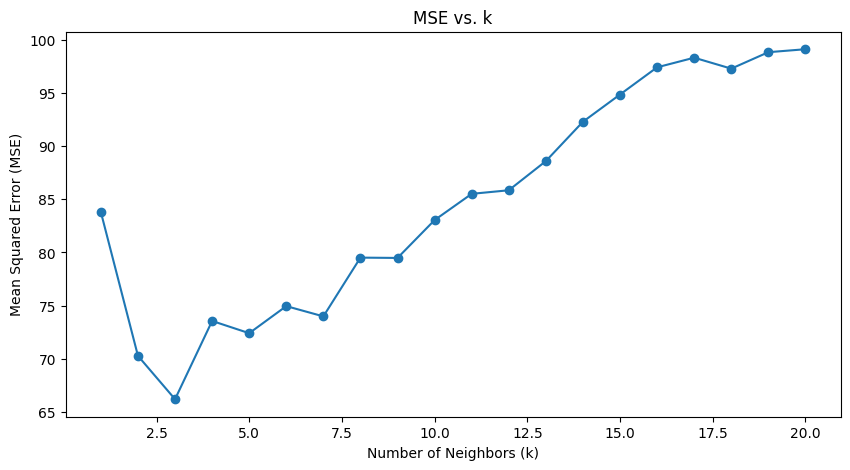

In [21]:
errors = []  # Store all the errors

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)  # Try with k neighbors
    knn.fit(X_train, y_train)  # Train
    y_pred = knn.predict(X_test)  # Predict
    mse = mean_squared_error(y_test, y_pred)  # Get the error
    errors.append(mse)  # Store the error

# Draw a graph to see which k is best
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), errors, marker='o')
plt.title("MSE vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()


In [22]:
# Find the best k based on the minimum MSE
best_k = errors.index(min(errors)) + 1  # Index + 1 because range started at 1
print(f"The best value of k is: {best_k}")


The best value of k is: 3


In [23]:
knn_optimal = KNeighborsRegressor(n_neighbors=3)
knn_optimal.fit(X_train, y_train)  # Train with k=3
# Make predictions again and check the performance
y_pred_optimal = knn_optimal.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print(f"Optimized Mean Squared Error: {mse_optimal}")
print(f"Optimized R-squared: {r2_optimal}")


Optimized Mean Squared Error: 66.2139883957771
Optimized R-squared: 0.7430390065270426


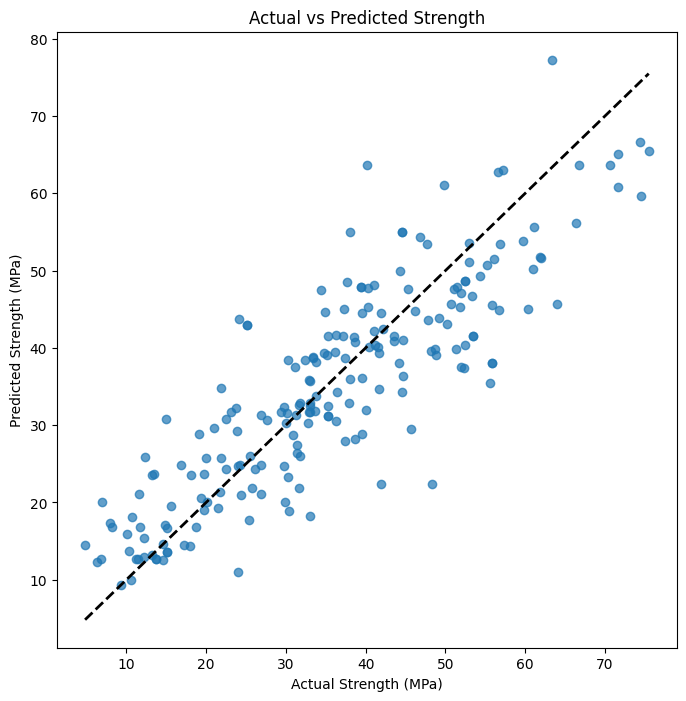

In [24]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_optimal, alpha=0.7)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Strength")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


Discussion
We tested different numbers of neighbors (k) and found that k=8 gave the best performance with an MSE of X and R² of Y. Scaling the data helped the KNN model perform better since it is sensitive to large values. Overall, the model worked well in predicting compressive strength but could struggle on much larger datasets.
